# 1_business_data_understanding_suto

**Purpose:** This notebook contains the business and data understanding according to [2020, Studer et al.](https://arxiv.org/abs/2003.05155) "Towards CRISP-ML(Q): A Machine Learning Process Model with Quality Assurance Methodology".

**Methodology:** Besides the methodology described by 2020, Studer et al., I will use the [EDA framework proposed by Tony Ojeda](https://www.youtube.com/watch?v=YEBRkLo568Q).

**Results:** Describe and comment the most important results.

---

**Suggested next steps**

- [ ] State suggested next steps, based on results obtained in this notebook.


# Setup

## Library import
We import all the required Python libraries

In [1]:
%matplotlib inline

import os
import pickle
from typing import List

# Data manipulation
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

os.chdir('../')
from src.utils.data_describe import breve_descricao, serie_nulos, cardinalidade
os.chdir('./notebooks/')

# Options for pandas
# pd.options.display.max_columns = None
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# pd.options.display.max_rows = 120

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

## Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.

In [2]:
RAW_FOLDER = '../data/raw/'
REPORTS_FOLDER = '../reports/'
RANDOM_STATE = 42


# Data import
We retrieve all the required data for the analysis.

In [3]:
df = pd.read_csv(RAW_FOLDER + 'train.csv', index_col=0)
df_evaluation = df.copy() 
df_evaluation.shape

(1460, 80)

## Initial evaluation

In [4]:
# Data types
df_evaluation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Presence of null values

In [5]:
lst_columns_null = serie_nulos(df_evaluation, corte=0.5).index.tolist()

lst_columns_null

4 atributos/features/campos possuem mais de 0.5 de valores nulos.


['PoolQC', 'MiscFeature', 'Alley', 'Fence']

In [6]:
cardinalidade(df_evaluation)

,Atributo,DType,Cardinalidade,Valores,Proporção Nulos
38,CentralAir,object,2,"[N, Y]",0.000000
3,Street,object,2,"[Grvl, Pave]",0.000000
7,Utilities,object,2,"[AllPub, NoSeWa]",0.000000
4,Alley,object,3,"[Grvl, NaN, Pave]",0.937671
45,BsmtHalfBath,int64,3,"[0, 1, 2]",0.000000
47,HalfBath,int64,3,"[0, 1, 2]",0.000000
9,LandSlope,object,3,"[Gtl, Mod, Sev]",0.000000
61,PavedDrive,object,3,"[N, P, Y]",0.000000
44,BsmtFullBath,int64,4,"[0, 1, 2, 3]",0.000000
24,ExterQual,object,4,"[Ex, Fa, Gd, TA]",0.000000


In [7]:
lst_time = [x for x in df_evaluation.columns if ('yr' in x.lower()) or ('year' in x.lower())]
# After reading the data description, I realized that 'MoSold' is a time attribute too.
lst_time.append('MoSold')

print(f"""There is/are {len(lst_time)} time attributes:
{lst_time}""")

There is/are 5 time attributes:
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold']


In [8]:
lst_area = [x for x in df_evaluation.columns if ('area' in x.lower()) or ('sf' in x.lower())]

print(f"""There is/are {len(lst_area)} area attributes:
{lst_area}""")

There is/are 14 area attributes:
['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea']


In [9]:
lst_float = [
    x for x in df_evaluation.select_dtypes(include='float64').columns.tolist() if (x not in lst_area) and (x not in lst_time)
]

print(f"""There is/are {len(lst_float)} float attributes:
{lst_float}""")

There is/are 1 float attributes:
['LotFrontage']


### Partial conclusions:
- From the 81 attributes, we have:
 - float64(3), int64(35), object(43)

- There are 4 attributes with more than 50% of null values:
 - PoolQC         0.995205
 - MiscFeature    0.963014
 - Alley          0.937671
 - Fence          0.807534

**Action:**

**30/05/2022**:
- The field 'id' will be dropped.
- The 4 attributes wit more than 80% of null values will be dropped.
- For the baseline model, I will take only the numerical, and time fields (
 - 5 time attributes;
 - 14 area attributes; and
 - 1 float attributes.

# Data types

In the previous section, we didn't engage in a deep understanding in the type of each attribute. The objective of this section will be a deeper analysis of the data types of each attribute.

This analysis will be conducted in all attributes, except the four attributes with more than 50% of null values: 'PoolQC', 'MiscFeature', 'Alley', 'Fence'. And I will follow from the lowest cardinality to the highest one.

In [10]:
# Removing columns with high null proportion:
df_evaluation = df.drop(columns=lst_columns_null).copy()

print(f"df_evaluation's shape: {df_evaluation.shape}")

df_evaluation's shape: (1460, 76)


## Target

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

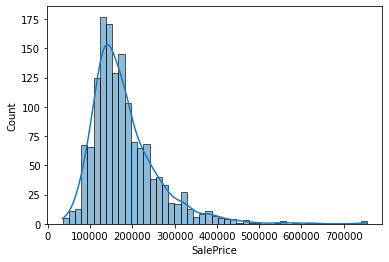

In [11]:
sns.histplot(df_evaluation['SalePrice'], kde=True)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

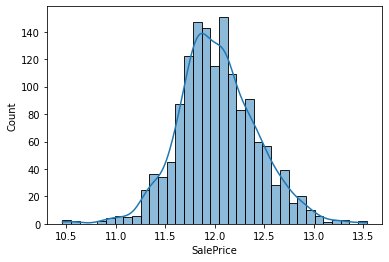

In [12]:
sns.histplot(np.log(df_evaluation['SalePrice']), kde=True)

In [13]:
np.log(df_evaluation['SalePrice']).describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

## Numerical atributes

Some of the numerical attributes are actually float and not integers (e.g.: any attribute related with area). Using the [data_descriptio.txt](../references/data_descriptio.txt), I will identify and change their data types to float.

In [14]:
df_numerical_cardinality = cardinalidade(df_evaluation.select_dtypes(include=[np.number, float, 'float64'])).copy()
df_numerical_cardinality

,Atributo,DType,Cardinalidade,Valores,Proporção Nulos
15,BsmtHalfBath,int64,3,"[0, 1, 2]",0.0
17,HalfBath,int64,3,"[0, 1, 2]",0.0
14,BsmtFullBath,int64,4,"[0, 1, 2, 3]",0.0
21,Fireplaces,int64,4,"[0, 1, 2, 3]",0.0
16,FullBath,int64,4,"[0, 1, 2, 3]",0.0
19,KitchenAbvGr,int64,4,"[0, 1, 2, 3]",0.0
22,GarageCars,int64,5,"[0, 1, 2, 3, 4]",0.0
32,YrSold,int64,5,"[2006, 2007, 2008, 2009, 2010]",0.0
18,BedroomAbvGr,int64,8,"[0, 1, 2, 3, 4, 5, 6, 8]",0.0
29,PoolArea,int64,8,"[0, 480, 512, 519, 555, 576, 648, 738]",0.0


### Transforming Int to Float

Attributes described in 'square feet' in data description, but without 'area' or 'sf' in the name:

- 'EnclosedPorch'
- '3SsnPorch'
- 'ScreenPorch'

'MiscVal' indicates a value and it is better treated as float number.

'SalePrice' is our target, but it is a float too and it will be transformed. 

In [15]:
# Attributes with area in the name or sf ('square feet') or described in 'square feet' in data description:

lst_area = [x for x in df_evaluation.columns if ('area' in x.lower()) or ('sf' in x.lower())]
lst_area.extend(['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice'])

print(f"""Qty of area attributes: {len(lst_area)}
---
Attributes:
{lst_area}""")

for column in lst_area:
    df_evaluation[column] = df[column].astype(float)

df_evaluation.select_dtypes(include=float).head(3)

Qty of area attributes: 19
---
Attributes:
['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,2003.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,208500.0
2,80.0,9600.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,1976.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,181500.0
3,68.0,11250.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,2001.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,223500.0


### Pearson's correlation

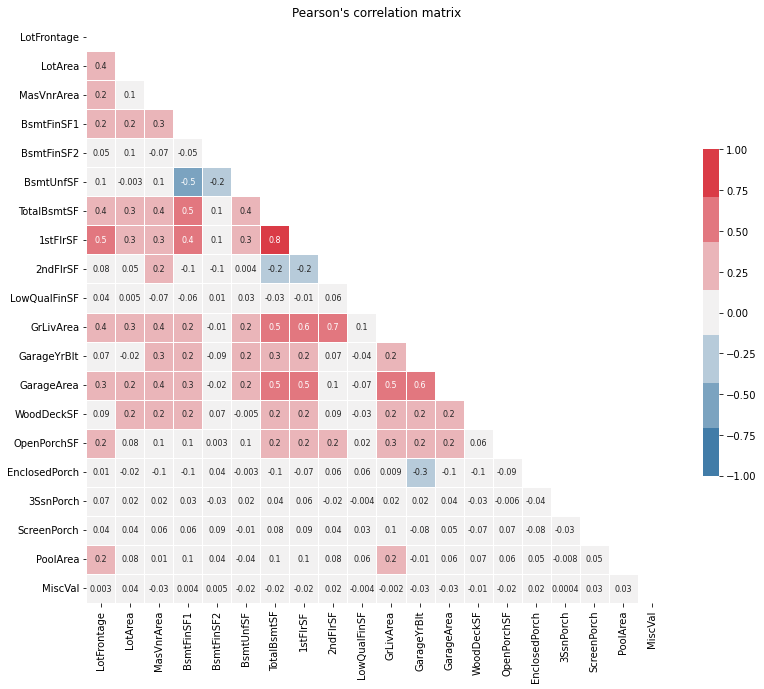

In [16]:
df_corr = df_evaluation.select_dtypes(include=float).drop(columns=['SalePrice'])


# The code below has been downloaded from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Compute the correlation matrix0
pearson_correlation = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(pearson_correlation, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 12))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(100, 5, as_cmap=True)
cmap = sns.diverging_palette(240, 10, n=7)
# sns.set_palette('Paired_r')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    pearson_correlation, mask=mask, cmap=cmap, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmin = -1,
    vmax = 1, annot = True, annot_kws = {'size': 8}, fmt='.0'
).set(title="Pearson's correlation matrix");

### Integers

In [17]:
print(f"""numerical: {len(df_evaluation.select_dtypes(include=[np.number]).columns)}
float: {len(df_evaluation.select_dtypes(include=[float]).columns)}
int: {len(df_evaluation.select_dtypes(include=[int]).columns)}

Integers' list:
{df_evaluation.select_dtypes(include=[int]).columns.tolist()}""")


numerical: 37
float: 21
int: 16

Integers' list:
['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']


As it can be above, among the integer attributes, there are attibutes related to time:

['YrSold', 'MoSold', 'YearRemodAdd', 'YearBuilt']

These attributes will be transformed further. Therefore, I'll remove them to simplify the analysis.

In [18]:
cardinalidade(df_evaluation.drop(columns=['YrSold', 'MoSold', 'YearRemodAdd', 'YearBuilt']).select_dtypes(include=[np.number]))

,Atributo,DType,Cardinalidade,Valores,Proporção Nulos
4,BsmtHalfBath,int64,3,"[0, 1, 2]",0.0
6,HalfBath,int64,3,"[0, 1, 2]",0.0
3,BsmtFullBath,int64,4,"[0, 1, 2, 3]",0.0
10,Fireplaces,int64,4,"[0, 1, 2, 3]",0.0
5,FullBath,int64,4,"[0, 1, 2, 3]",0.0
8,KitchenAbvGr,int64,4,"[0, 1, 2, 3]",0.0
11,GarageCars,int64,5,"[0, 1, 2, 3, 4]",0.0
7,BedroomAbvGr,int64,8,"[0, 1, 2, 3, 4, 5, 6, 8]",0.0
2,OverallCond,int64,9,"[1, 2, 3, 4, 5, 6, 7, 8, 9]",0.0
1,OverallQual,int64,10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",0.0


From the table above and using the [data_description file](../references/data_description.txt), the following strategy can be used:

'BsmtHalfBath', 'HalfBath', 'BsmtFullBath', 'Fireplaces', 'FullBath', 'KitchenAbvGr', 'GarageCars', 'BedroomAbvGr', 'OverallCond', 'OverallQual', 'TotRmsAbvGrd': the values of these attibutes can be use without any treatment, because their values represent an ordinal category.

For the 'MSSubClass', it needs further analysis.

##  Categorical attributes

### Binaries

The attributes 'CentralAir', 'Street', and 'Utilities' have cardinality equal to two. But, according to [data_descriptio.txt](../references/data_descriptio.txt), 'Utilities' is not a binary attribute. In spite of this later information, I will deal 'Utilities' as a binary attubute, changing its name for 'is_all_pub_utilities'.

'CentralAir' and 'Street' will be replaced by 'has_central_air' and 'is_paved_street', respectively.

In [19]:
df_evaluation['has_central_air'] = np.where(df_evaluation['CentralAir']=='Y', 1, 0)
df_evaluation['is_paved_street'] = np.where(df_evaluation['Street']=='Pave', 1, 0)
df_evaluation['is_all_pub_utilities'] = np.where(df_evaluation['Utilities']=='AllPub', 1, 0)

df_evaluation.loc[:, [
    'has_central_air', 'CentralAir', 'is_paved_street', 'Street', 'is_all_pub_utilities', 'Utilities'
]].sample(10, random_state=RANDOM_STATE)

,has_central_air,CentralAir,is_paved_street,Street,is_all_pub_utilities,Utilities
Id,,,,,,
893,1,Y,1,Pave,1,AllPub
1106,1,Y,1,Pave,1,AllPub
414,1,Y,1,Pave,1,AllPub
523,1,Y,1,Pave,1,AllPub
1037,1,Y,1,Pave,1,AllPub
615,1,Y,1,Pave,1,AllPub
219,1,Y,1,Pave,1,AllPub
1161,1,Y,1,Pave,1,AllPub
650,1,Y,1,Pave,1,AllPub


### Non binary categorical attributes

In [20]:
cardinalidade_objects = cardinalidade(df_evaluation.select_dtypes(include='object')).loc[
    (cardinalidade(df_evaluation.select_dtypes(include='object'))['Cardinalidade']>2), :
]

print(f"Categorical attributes without binaries: {len(cardinalidade_objects)}")

cardinalidade_objects

Categorical attributes without binaries: 36


,Atributo,DType,Cardinalidade,Valores,Proporção Nulos
6,LandSlope,object,3,"[Gtl, Mod, Sev]",0.000000
36,PavedDrive,object,3,"[N, P, Y]",0.000000
17,ExterQual,object,4,"[Ex, Fa, Gd, TA]",0.000000
33,GarageFinish,object,4,"[Fin, NaN, RFn, Unf]",0.055479
29,KitchenQual,object,4,"[Ex, Fa, Gd, TA]",0.000000
3,LandContour,object,4,"[Bnk, HLS, Low, Lvl]",0.000000
2,LotShape,object,4,"[IR1, IR2, IR3, Reg]",0.000000
10,BldgType,object,5,"[1Fam, 2fmCon, Duplex, Twnhs, TwnhsE]",0.000000
21,BsmtCond,object,5,"[Fa, Gd, NaN, Po, TA]",0.025342
22,BsmtExposure,object,5,"[Av, Gd, Mn, NaN, No]",0.026027


In [34]:
cardinalidade_min = 2
cardinalidade_max = 30

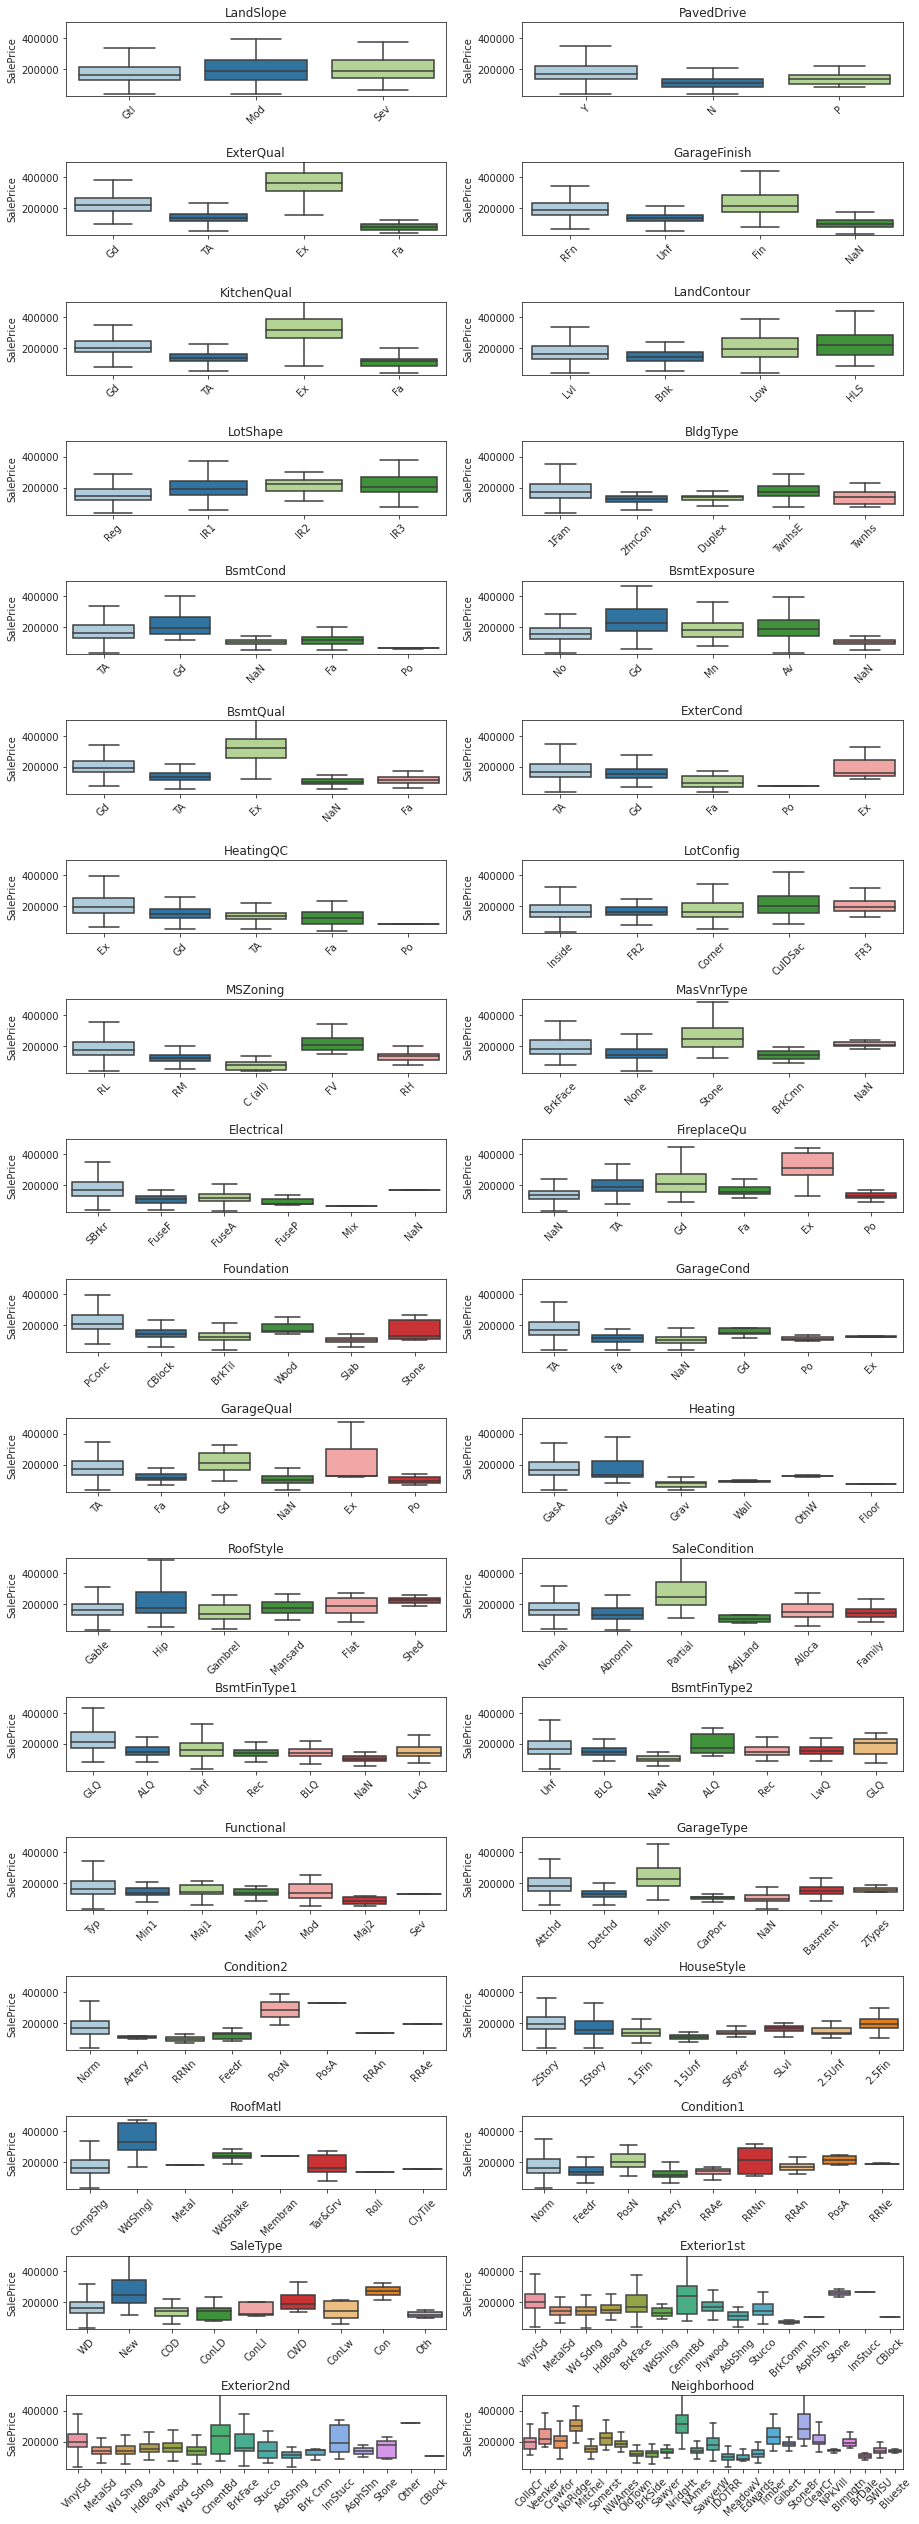

In [38]:
categorical_features = cardinalidade(df_evaluation.select_dtypes(include='object')).loc[
    (cardinalidade(df_evaluation.select_dtypes(include='object'))['Cardinalidade']>cardinalidade_min) &
    (cardinalidade(df_evaluation.select_dtypes(include='object'))['Cardinalidade']<=cardinalidade_max), 'Atributo'
].tolist()

ncols = 2 
nrows = len(categorical_features)//ncols

f = plt.figure(figsize=(15, 45))
# f.subtitle('SalePrice per Categorical attributes')
sns.set_palette("Paired")

gs = f.add_gridspec(
    nrows=nrows, ncols=ncols, wspace=.2, hspace=.9
)

row = col = 0
for i, feature in enumerate(categorical_features):
    with sns.axes_style("ticks"):
        ax = f.add_subplot(gs[row, col])
        ax = sns.boxplot(data=df_evaluation, x=feature, y="SalePrice", fliersize=0);
        ax.set(
            title=feature, xlabel="", ylabel="SalePrice", ylim=(25000, 500000)
        )
        plt.xticks(rotation=45)
#         ax.get_legend().set_visible(False)
        if (i+1)%ncols!=0:
            col += 1
        else:
            col = 0
            row+=1

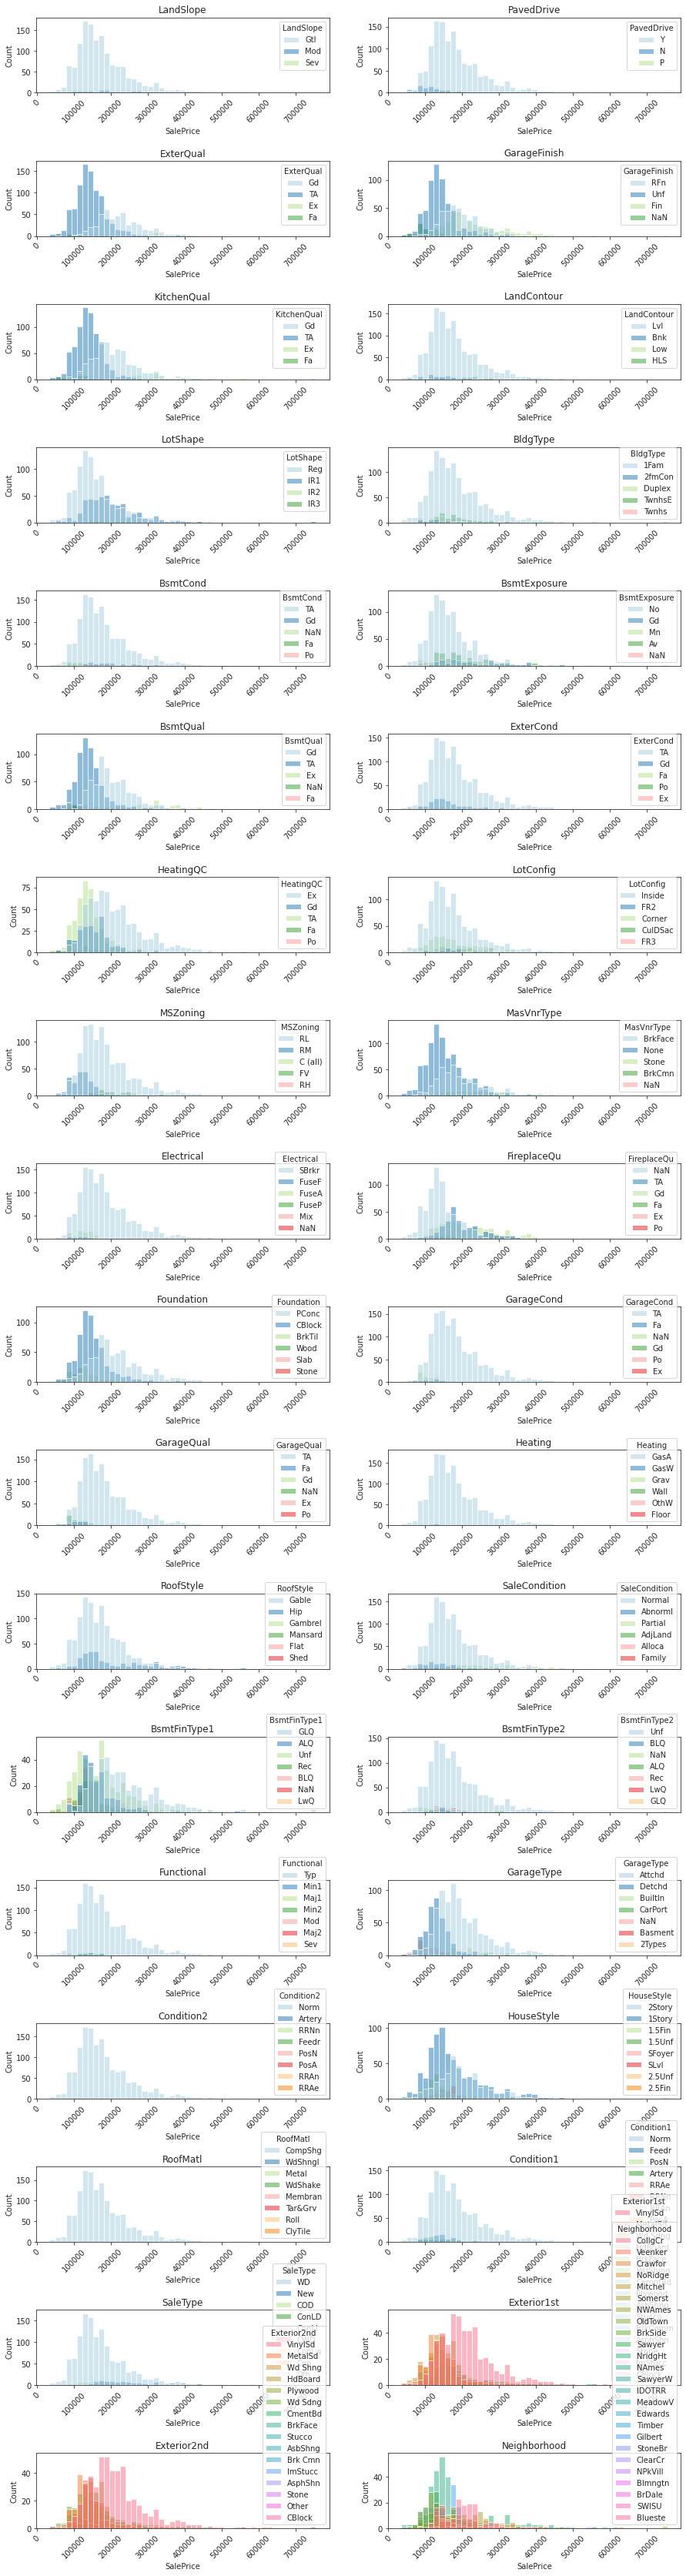

In [37]:
categorical_features = cardinalidade(df_evaluation.select_dtypes(include='object')).loc[
    (cardinalidade(df_evaluation.select_dtypes(include='object'))['Cardinalidade']>cardinalidade_min) &
    (cardinalidade(df_evaluation.select_dtypes(include='object'))['Cardinalidade']<=cardinalidade_max), 'Atributo'
].tolist()

ncols = 2 
nrows = len(categorical_features)//ncols

f = plt.figure(figsize=(15, 60))
# f.subtitle('SalePrice per Categorical attributes')
sns.set_palette("Paired")

gs = f.add_gridspec(
    nrows=nrows, ncols=ncols, wspace=.2, hspace=.9
)

row = col = 0
for i, feature in enumerate(categorical_features):
    with sns.axes_style("ticks"):
        ax = f.add_subplot(gs[row, col])
        ax = sns.histplot(data=df_evaluation, x="SalePrice", hue=feature);
        ax.set(
            title=feature, xlabel="SalePrice"
        )
        plt.xticks(rotation=45)
#         ax.get_legend().set_visible(False)
        if (i+1)%ncols!=0:
            col += 1
        else:
            col = 0
            row+=1

In [26]:
categorical_features

['LandSlope',
 'PavedDrive',
 'ExterQual',
 'GarageFinish',
 'KitchenQual',
 'LandContour',
 'LotShape',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtQual',
 'ExterCond',
 'HeatingQC',
 'LotConfig',
 'MSZoning',
 'MasVnrType',
 'Electrical',
 'FireplaceQu',
 'Foundation',
 'GarageCond',
 'GarageQual',
 'Heating',
 'RoofStyle',
 'SaleCondition',
 'BsmtFinType1',
 'BsmtFinType2',
 'Functional',
 'GarageType',
 'Condition2',
 'HouseStyle',
 'RoofMatl',
 'Condition1',
 'SaleType',
 'Exterior1st',
 'Exterior2nd',
 'Neighborhood']

###  Partial conclusions

Numerical a

## Using pandas-profiling

In [23]:
# profile = ProfileReport(df, title="Pandas Profiling Report", correlations={"cramers": {"calculate": False}})
# profile.to_file(REPORTS_FOLDER + "EDA_01.html")
# profile.to_notebook_iframe()